<a href="https://colab.research.google.com/github/ozgurshn/MedicalDeepLearning/blob/master/simpleITK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpleitk

     |████████████████████████████████| 42.5MB 54kB/s 


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
!ls '/gdrive/My Drive/itk/'


unnamed.png


In [103]:
path = '/gdrive/My Drive/itk/unnamed.png'
print(image.GetPixelID())
print(sitk.GetPixelIDValueAsString(image.GetPixelID()))


13
vector of 8-bit unsigned integer


In [0]:
##n4 bias field correction

import SimpleITK as sitk
import sys
import os
import matplotlib.pyplot as plt

inputImage = sitk.ReadImage('/gdrive/My Drive/itk/unnamed.png',sitk.sitkUInt8)

maskImage = sitk.OtsuThreshold( inputImage, 0, 1, 200 )

inputImage = sitk.Cast( inputImage, sitk.sitkFloat32 )

corrector = sitk.N4BiasFieldCorrectionImageFilter();

numberFittingLevels = 4

output = corrector.Execute( inputImage, maskImage )

outputCasted = sitk.Cast(output,sitk.sitkVectorUInt8)

sitk.WriteImage( outputCasted, '/gdrive/My Drive/itk/output.png' )




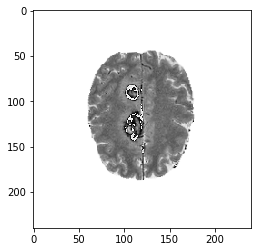

In [100]:
npa = sitk.GetArrayViewFromImage(outputCasted)

plt.imshow(npa, cmap='Greys',  interpolation='nearest')

plt.show()
